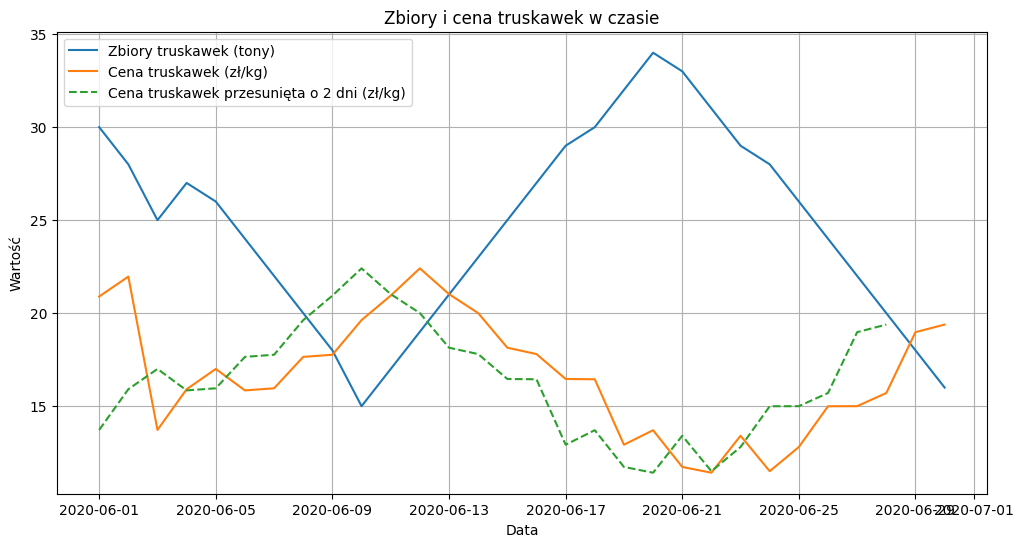

TEST PRZYCZYNOWOŚCI GRANGERA - TRUSKAWKI

1. CZY ZBIORY POWODUJĄ CENĘ W SENSIE GRANGERA?
H0: Zbiory nie powodują ceny w sensie Grangera
H1: Zbiory powodują cenę w sensie Grangera
--------------------------------------------------
Lag 1: F-statistic = 18.6294, p-value = 0.0002
         Wniosek (α=0.05): ZBIORY POWODUJĄ CENĘ
Lag 2: F-statistic = 77.0644, p-value = 0.0000
         Wniosek (α=0.05): ZBIORY POWODUJĄ CENĘ
Lag 3: F-statistic = 28.0052, p-value = 0.0000
         Wniosek (α=0.05): ZBIORY POWODUJĄ CENĘ

2. CZY CENA POWODUJE ZBIORY W SENSIE GRANGERA?
H0: Cena nie powoduje zbiorów w sensie Grangera
H1: Cena powoduje zbiory w sensie Grangera
--------------------------------------------------
Lag 1: F-statistic = 2.5240, p-value = 0.1242
         Wniosek (α=0.05): CENA NIE POWODUJE ZBIORÓW
Lag 2: F-statistic = 5.9075, p-value = 0.0085
         Wniosek (α=0.05): CENA POWODUJE ZBIORY
Lag 3: F-statistic = 4.7960, p-value = 0.0112
         Wniosek (α=0.05): CENA POWODUJE ZBIORY

INTERPR

In [1]:
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


zbiory_truskawek = pd.DataFrame({
    'quantity': [30, 28, 25, 27, 26, 24, 22, 20, 18, 15, 17, 19, 21, 23, 25, 27, 29, 30, 32, 34, 33, 31, 29, 28, 26, 24, 22, 20, 18, 16],
    'time': pd.date_range(start='2020-06-01', periods=30, freq='D'),
})  # Zbiory truskawek w tonach

zbiory_truskawek.set_index('time', inplace=True)


#!!! Uwaga dane są sztucznie wygenerowane dla celów demonstracyjnych jak poniżej, cena jest odwrotnie skorelowana ze zbiorami ze zbiorami z opóźnieniem 2 dni (potrzebnych na transport i sprzedaż)
# p = [30 - (x * (0.5 + np.random.rand()/10))  for x in zbiory_truskawek['quantity']]
# swie ostatnie wartości przeniosłem na początek aby zamarkować przesunięcie w czasie



cena_truskawek = pd.DataFrame({
    'price': [20.893901441933032, 21.964857922348017,13.722835841307369, 15.910655775631852, 17.002000671251412, 15.847090491032427, 15.961106050374735, 17.650478863329678, 17.763836868801373, 19.626878714407127, 20.943438361757234, 22.407845662119733, 21.023587900675714, 20.003954539511493, 18.143113825964132, 17.800222785320088, 16.461794817201465, 16.445085988709078, 12.92771817684946, 13.70741163350258, 11.733063525374693, 11.422094021825096, 13.40975237027402, 11.504159304231624, 12.805272293812333, 14.995581981307879, 15.00049183921443, 15.707363595208017, 18.978866294208984, 19.38556975615259],
    'time': pd.date_range(start='2020-06-01', periods=30, freq='D'),
})  # Ceny truskawek w złotych za kilogram
cena_truskawek.set_index('time', inplace=True)


figure = plt.figure(figsize=(12,6))
plt.plot(zbiory_truskawek, label='Zbiory truskawek (tony)')
plt.plot(cena_truskawek, label='Cena truskawek (zł/kg)')
plt.plot(cena_truskawek.shift(-2), label='Cena truskawek przesunięta o 2 dni (zł/kg)', linestyle='--')
plt.title('Zbiory i cena truskawek w czasie')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.legend()
plt.grid()
plt.show()

# TEST PRZYCZYNOWOŚCI GRANGERA
print("=" * 60)
print("TEST PRZYCZYNOWOŚCI GRANGERA - TRUSKAWKI")
print("=" * 60)

# Przygotowanie danych - łączenie w jeden DataFrame
data_granger = pd.DataFrame({
    'cena': cena_truskawek['price'].values,
    'zbiory': zbiory_truskawek['quantity'].values
})

print("\n1. CZY ZBIORY POWODUJĄ CENĘ W SENSIE GRANGERA?")
print("H0: Zbiory nie powodują ceny w sensie Grangera")
print("H1: Zbiory powodują cenę w sensie Grangera")
print("-" * 50)

# Test: czy zbiory powodują cenę
try:
    result_zbiory_cena = grangercausalitytests(data_granger[['cena', 'zbiory']], maxlag=3, verbose=False)
    
    for lag in range(1, 4):
        f_stat = result_zbiory_cena[lag][0]['ssr_ftest'][0]
        p_value = result_zbiory_cena[lag][0]['ssr_ftest'][1]
        print(f"Lag {lag}: F-statistic = {f_stat:.4f}, p-value = {p_value:.4f}")
        conclusion = "ZBIORY POWODUJĄ CENĘ" if p_value < 0.05 else "ZBIORY NIE POWODUJĄ CENY"
        print(f"         Wniosek (α=0.05): {conclusion}")
        
except Exception as e:
    print(f"Błąd w teście: {e}")

print("\n2. CZY CENA POWODUJE ZBIORY W SENSIE GRANGERA?")
print("H0: Cena nie powoduje zbiorów w sensie Grangera") 
print("H1: Cena powoduje zbiory w sensie Grangera")
print("-" * 50)

# Test: czy cena powoduje zbiory
try:
    result_cena_zbiory = grangercausalitytests(data_granger[['zbiory', 'cena']], maxlag=3, verbose=False)
    
    for lag in range(1, 4):
        f_stat = result_cena_zbiory[lag][0]['ssr_ftest'][0]
        p_value = result_cena_zbiory[lag][0]['ssr_ftest'][1]
        print(f"Lag {lag}: F-statistic = {f_stat:.4f}, p-value = {p_value:.4f}")
        conclusion = "CENA POWODUJE ZBIORY" if p_value < 0.05 else "CENA NIE POWODUJE ZBIORÓW"
        print(f"         Wniosek (α=0.05): {conclusion}")
        
except Exception as e:
    print(f"Błąd w teście: {e}")

print("\n" + "=" * 60)
print("INTERPRETACJA EKONOMICZNA:")
print("=" * 60)
print("- Jeśli ZBIORY → CENA: Większe zbiory poprzedzają niższe ceny (prawo popytu i podaży)")
print("- Jeśli CENA → ZBIORY: Wyższe ceny motywują producentów do większych zbiorów")
print("- Brak przyczynowości: Zmienne są niezależne czasowo")
print("- Przyczynowość dwustronna: Feedback loop między ceną a zbiorami")
print("\nUWAGA: To przyczynowość statystyczna, nie ekonomiczna przyczynowość!")